<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-I-Figols/blob/main/Ejercicio_15_Oct_(Lineas_de_espera).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import math
from math import log, exp, sqrt, cos, acos, pi, sin, factorial
from statistics import mean, stdev, variance
from scipy.stats import norm
import random as rnd
from random import random, gauss
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import minimize
from numba import jit
# < > ∈ o ∉ |

In [4]:
n=100
l_l = 1
l_s = 0.8
tl = 0
tis = 0
ts = tis - (1/l_s)* log(random())
for i in range(n):
  print("%4d"%i,"%8.3f"% tl, "%8.3f"%tis, "%8.3f"%ts )
  tl = tl - (1/l_l)*log(random())
  tis = max(tl, ts)
  ts = tis - (1/l_s)*log(random())


   0    0.000    0.000    1.839
   1    2.444    2.444    5.541
   2    2.906    5.541    5.803
   3    4.898    5.803    6.584
   4    6.371    6.584    6.635
   5    7.668    7.668    9.706
   6    8.091    9.706   10.446
   7    8.244   10.446   11.497
   8    8.406   11.497   11.643
   9    8.704   11.643   15.054
  10    9.015   15.054   15.626
  11    9.111   15.626   16.580
  12   13.482   16.580   17.426
  13   14.774   17.426   18.578
  14   16.922   18.578   23.875
  15   17.902   23.875   24.072
  16   18.274   24.072   24.108
  17   19.243   24.108   26.063
  18   19.674   26.063   27.309
  19   19.757   27.309   28.856
  20   20.277   28.856   29.528
  21   20.457   29.528   31.201
  22   20.652   31.201   33.365
  23   20.864   33.365   33.947
  24   22.357   33.947   34.034
  25   22.492   34.034   34.248
  26   23.330   34.248   34.743
  27   23.953   34.743   39.792
  28   24.166   39.792   40.236
  29   27.235   40.236   41.323
  30   28.229   41.323   41.530
  31   2

In [12]:
# Para el ejercicio d del dia 14 oct
# ts= tiempo de salida
# tl = tiempo de llegada
#n=100
T = 60
l_l = 1
l_s = 0.8
tl = 0
tis = 0
ts = tis - (1/l_s)* log(random())
# for i in range(n):
i=0
suma=0
while ts < T:
  print("%8.3f"% tl, "%8.3f"%tis, "%8.3f"%ts, "%8.3f"% (ts - tl))
  tl = tl - (1/l_l)*log(random())
  tis = max(tl, ts)
  ts = tis - (1/l_s)*log(random())
  i = i + 1
  suma= suma + (ts - tl)
print(suma/i)  # variable aleatoria

   0.000    0.000    0.707    0.707
   1.910    1.910    2.458    0.548
   2.745    2.745    3.817    1.072
   2.879    3.817    3.903    1.024
   3.715    3.903    4.927    1.212
   4.124    4.927    7.103    2.979
   4.208    7.103    9.330    5.123
   4.651    9.330   10.465    5.815
   6.651   10.465   13.482    6.831
   6.838   13.482   15.529    8.691
   7.883   15.529   17.961   10.078
  10.527   17.961   19.173    8.646
  10.926   19.173   25.286   14.360
  11.270   25.286   27.154   15.884
  12.353   27.154   28.101   15.748
  14.348   28.101   30.553   16.205
  16.055   30.553   32.075   16.020
  16.096   32.075   32.346   16.250
  16.414   32.346   33.291   16.877
  18.930   33.291   35.293   16.362
  19.624   35.293   35.993   16.369
  19.861   35.993   38.318   18.458
  24.235   38.318   39.181   14.946
  27.367   39.181   39.394   12.028
  27.906   39.394   46.692   18.786
  28.210   46.692   50.840   22.630
  30.554   50.840   51.881   21.328
  30.573   51.881   59.477  

In [13]:
def f():
  T = 60
  l_l = 1
  l_s = 0.8
  tl = 0
  tis = 0
  ts = tis - (1/l_s)* log(random())
  i=0
  suma=0
  while ts < T:
    tl = tl - (1/l_l)*log(random())
    tis = max(tl, ts)
    ts = tis - (1/l_s)*log(random())
    i = i + 1
    suma= suma + (ts - tl)
    return suma/i
ns= 1000000
suma=0
for i in range(ns):
  suma=suma + f()
print(suma/ns)  # variable aleatoria

1.9411606082165287


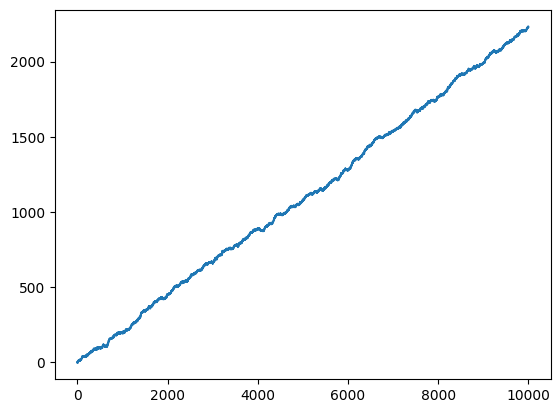

In [18]:
@jit(nopython=True)
def f(l_l, l_s, T):
  lt=[]
  ll=[]
  t=0
  infi=1000000000
  ts= infi
  tl=0
  l=0

  while t < T:
    lt. append(t)
    ll. append(l)
    t= min(tl, ts)
    if t==tl:
      l=l+1
      tl= t - (1/l_l)*log(random())
      if l==1:
        ts = t - (1/l_s)*log(random())
    else:
      l=l-1
      if l==0:
        ts=infi
      else:
        ts = t - (1/l_s)*log(random())
  return lt, ll
l_l=1
l_s=0.8
T=10000
lt, lx= f(l_l, l_s, T)
plt.plot(lt, lx)
plt.show()

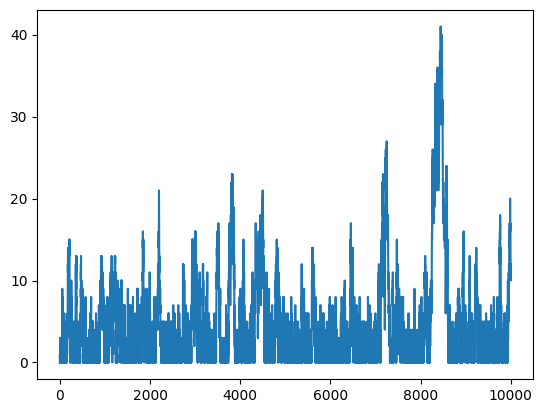

In [19]:
##estacionario
l_l=0.8
l_s=1
T=10000
lt, lx= f(l_l, l_s, T)
plt.plot(lt, lx)
plt.show()

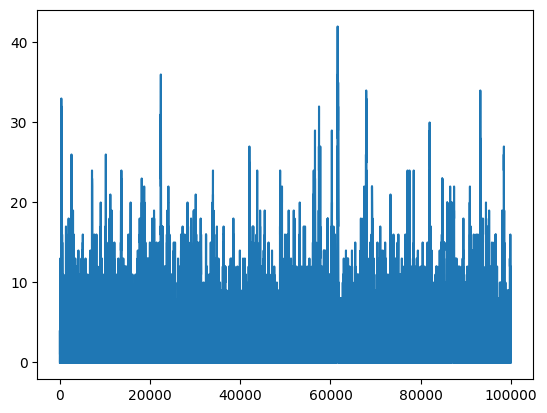

In [20]:
l_l= 0.8
l_s= 1
T=100000
lt, lx= f(l_l, l_s, T)
plt.plot(lt, lx)
plt.show()

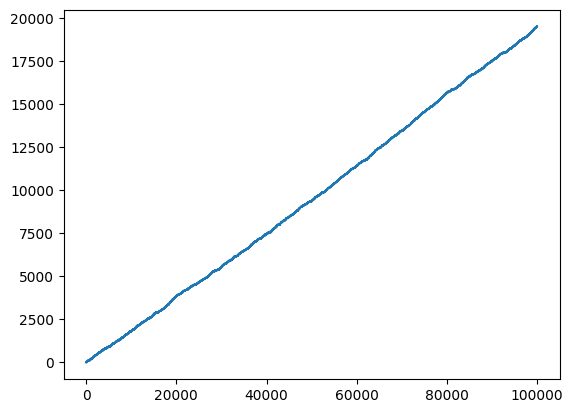

In [21]:
l_l= 1
l_s= 0.8
T=100000
lt, lx= f(l_l, l_s, T)
plt.plot(lt, lx)
plt.show()

In [ ]:
# estacionario en el sentido debil?






In [ ]:





# NO son estacionarios

In [ ]:
# regresion lineal
##primer dato pendiente
# segundo dato interseccion u ordenada al origen (intersept)
## tercer dato  revalue correlacion entre las 2
#
#

In [ ]:
#